In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, SimpleRNN,Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam

2025-02-13 15:57:43.293335: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load your dataset (replace 'your_dataset.csv' with your file path)
data = pd.read_csv('../data/Data-Melbourne_F_fixed.csv',index_col= 0)
data.shape

(1382, 19)

In [4]:
data.sample(5)

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
785,3.479,4.440,291341.0,47.0,510.0,910.0,65.114,18.2,25.0,13.0,0.0,60.0,0.0,0.0,13.3,31.7,2017.0,2.0,2.0
708,7.465,6.998,329858.0,24.0,320.0,590.0,52.819,13.4,18.0,9.9,0.0,58.0,0.0,9.7,22.2,29.4,2016.0,10.0,17.0
10,2.971,3.775,171123.0,47.0,435.0,870.0,65.531,32.1,42.9,23.7,0.0,29.0,0.0,0.0,18.0,35.2,2014.0,1.0,15.0
972,3.897,4.277,276256.0,47.0,340.0,860.0,63.840,17.6,28.3,7.0,0.0,42.0,0.0,9.3,32.0,57.6,2017.0,10.0,29.0
120,3.014,3.543,270896.0,35.0,368.5,737.0,61.384,10.1,11.0,5.4,0.0,52.0,0.0,0.0,31.1,44.6,2014.0,6.0,19.0


In [5]:
data.columns

Index(['Average Outflow', 'Average Inflow', 'Energy Consumption', 'Ammonia',
       'Biological Oxygen Demand', 'Chemical Oxygen Demand', 'Total Nitrogen',
       'Average Temperature', 'Maximum temperature', 'Minimum temperature',
       'Atmospheric pressure', 'Average humidity', 'Total rainfall',
       'Average visibility', 'Average wind speed', 'Maximum wind speed',
       'Year', 'Month', 'Day'],
      dtype='object')

In [6]:
data.isna().sum()

Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64

In [7]:
data.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660
std,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422
min,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000
50%,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000
75%,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000
max,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1382 entries, 0 to 1381
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average Outflow           1382 non-null   float64
 1   Average Inflow            1382 non-null   float64
 2   Energy Consumption        1382 non-null   float64
 3   Ammonia                   1382 non-null   float64
 4   Biological Oxygen Demand  1382 non-null   float64
 5   Chemical Oxygen Demand    1382 non-null   float64
 6   Total Nitrogen            1382 non-null   float64
 7   Average Temperature       1382 non-null   float64
 8   Maximum temperature       1382 non-null   float64
 9   Minimum temperature       1382 non-null   float64
 10  Atmospheric pressure      1382 non-null   float64
 11  Average humidity          1382 non-null   float64
 12  Total rainfall            1382 non-null   float64
 13  Average visibility        1382 non-null   float64
 14  Average wind 

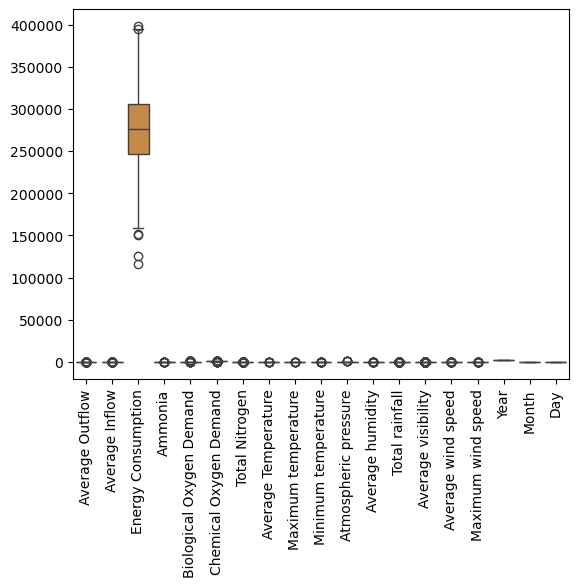

In [9]:
sns.boxplot(data)
plt.xticks(rotation= 90)
plt.show()

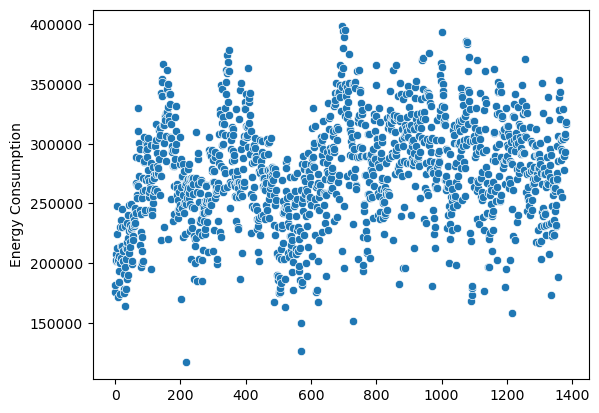

In [10]:
sns.scatterplot(data['Energy Consumption'])
plt.show()

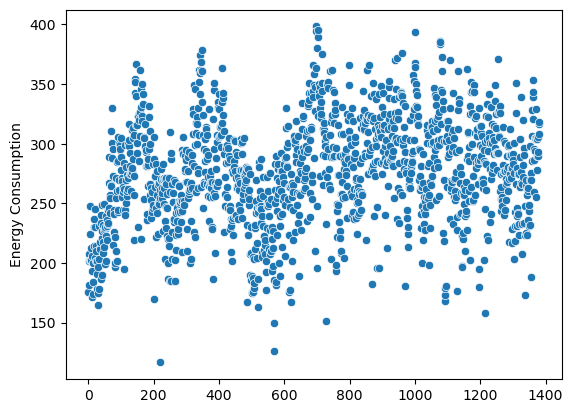

In [11]:
data['Energy Consumption'] = round(data['Energy Consumption'] / 1000, 1)
sns.scatterplot(data['Energy Consumption'])
plt.show()

In [12]:
atmospheric_values = [
    'Average Temperature',
    'Maximum temperature',
    'Minimum temperature',
    'Atmospheric pressure',
    'Average humidity',
    'Total rainfall',
    'Average visibility',
    'Average wind speed',
    'Maximum wind speed',
]
data[atmospheric_values]

,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed
0,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5
1,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8
2,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1
3,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9
4,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2
...,...,...,...,...,...,...,...,...,...
1377,6.8,10.0,4.0,0.0,56.0,0.00,10.0,14.4,22.2
1378,7.6,16.0,3.0,0.0,71.0,0.00,0.0,13.5,25.9
1379,9.7,16.0,3.0,0.0,65.0,0.00,10.0,18.1,25.9
1380,10.9,17.0,5.0,0.0,65.0,0.00,10.0,21.9,35.2


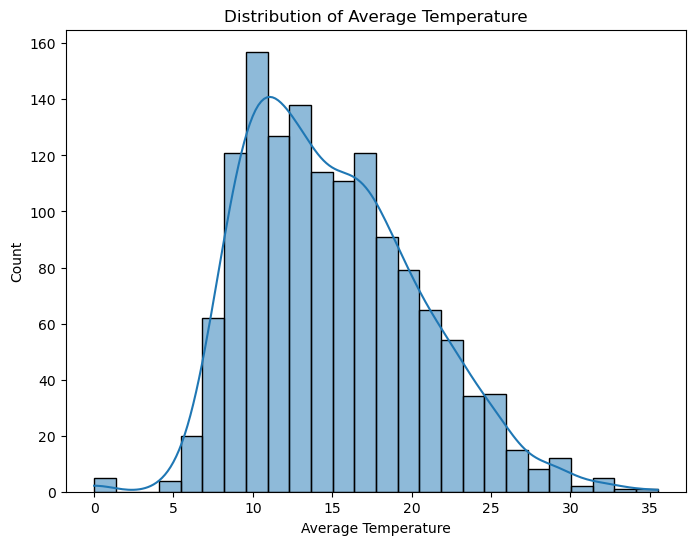

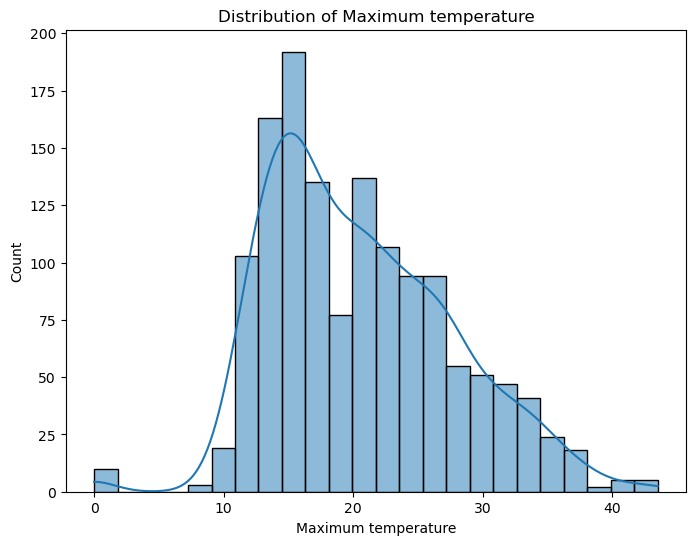

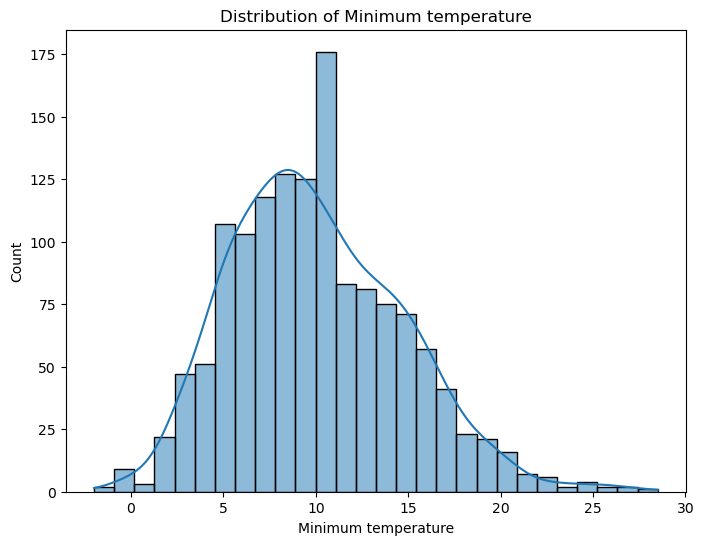

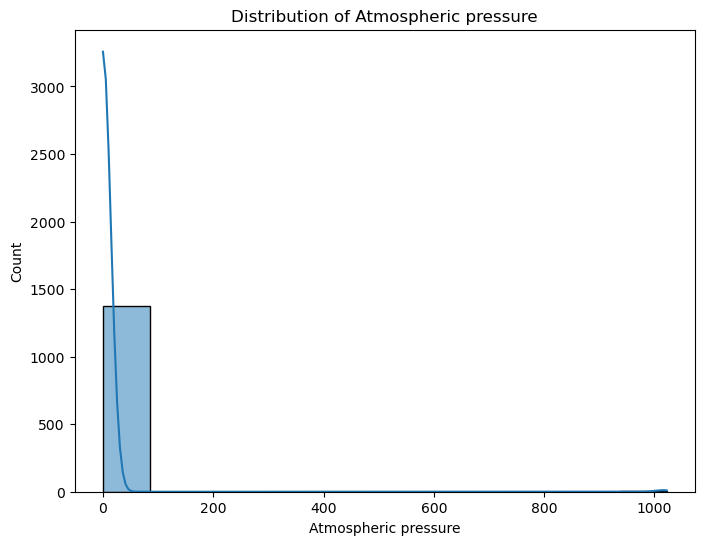

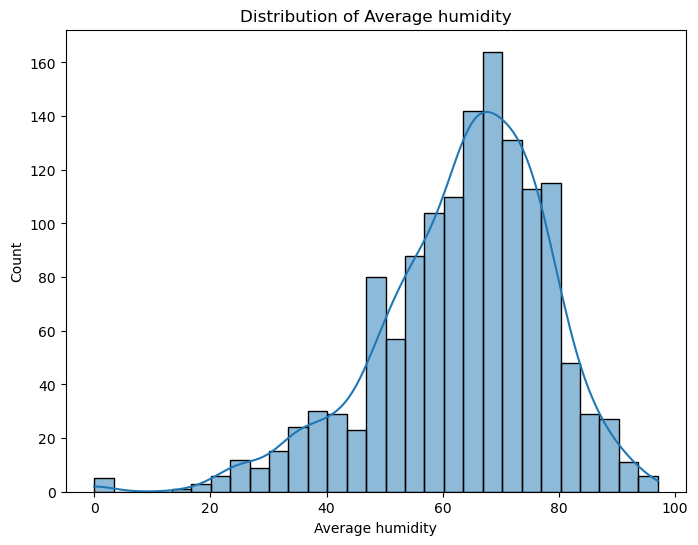

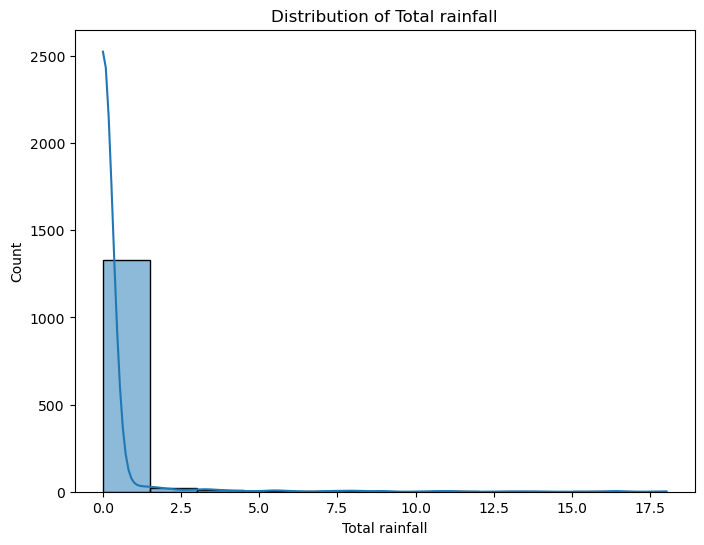

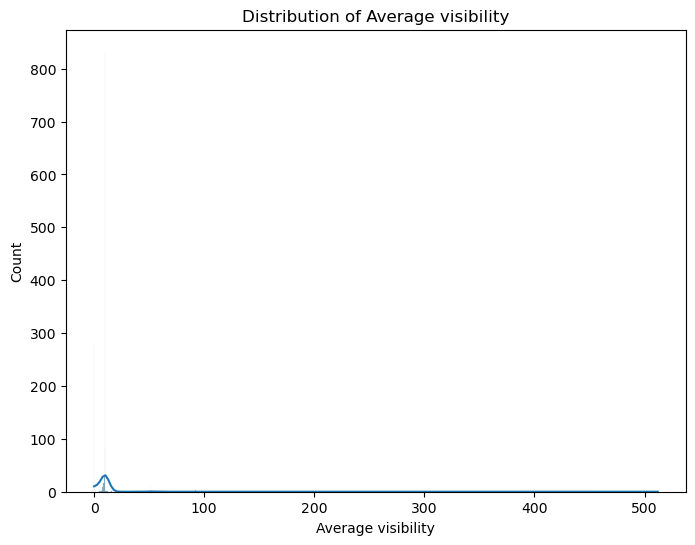

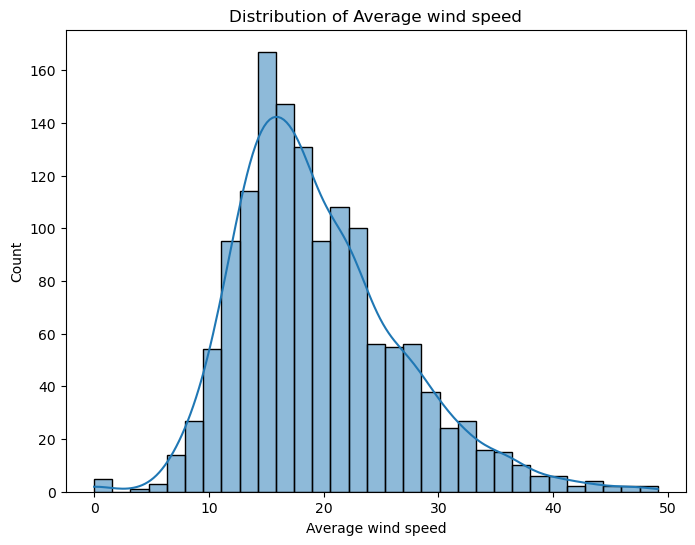

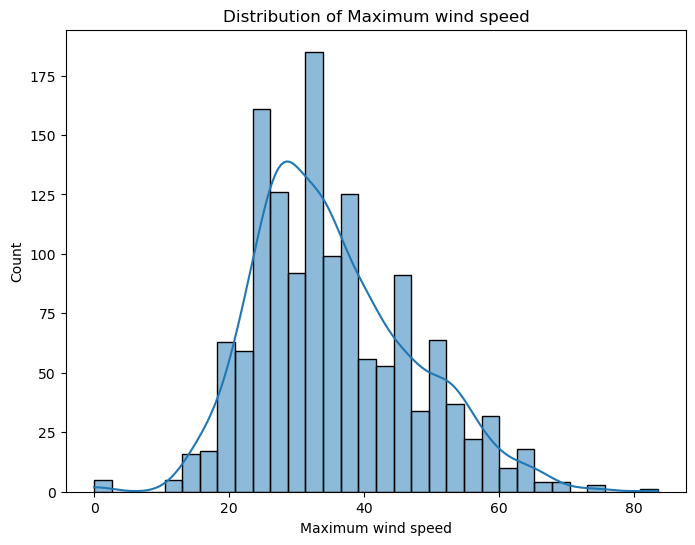

In [13]:
for col in atmospheric_values:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

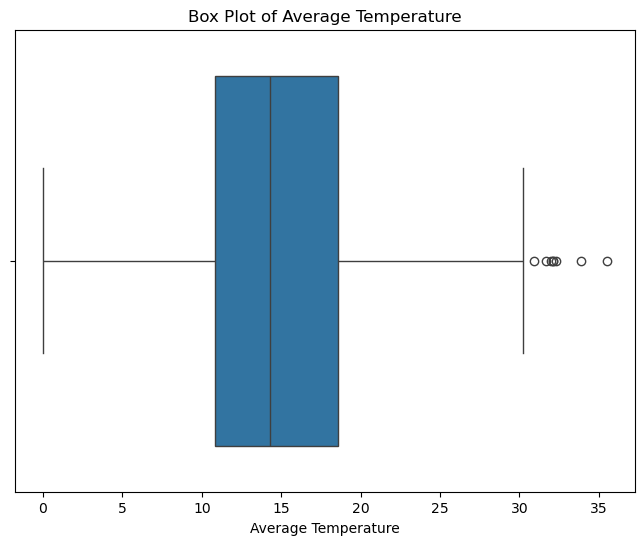

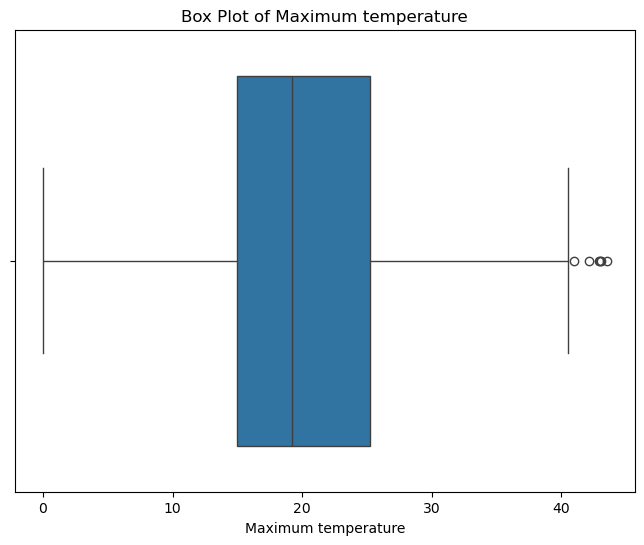

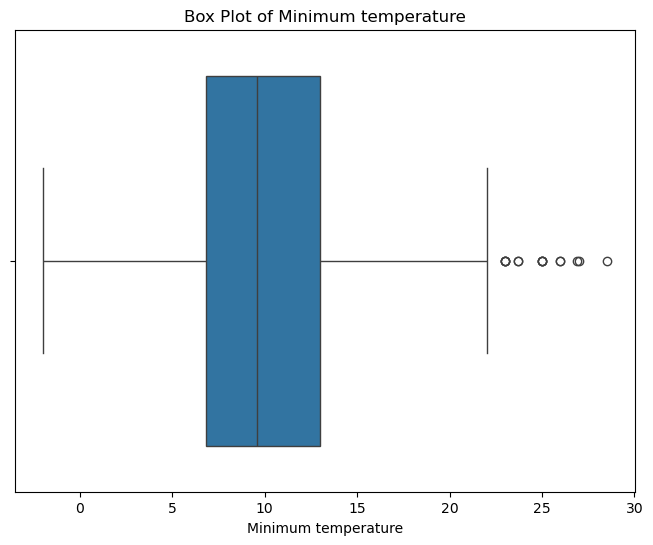

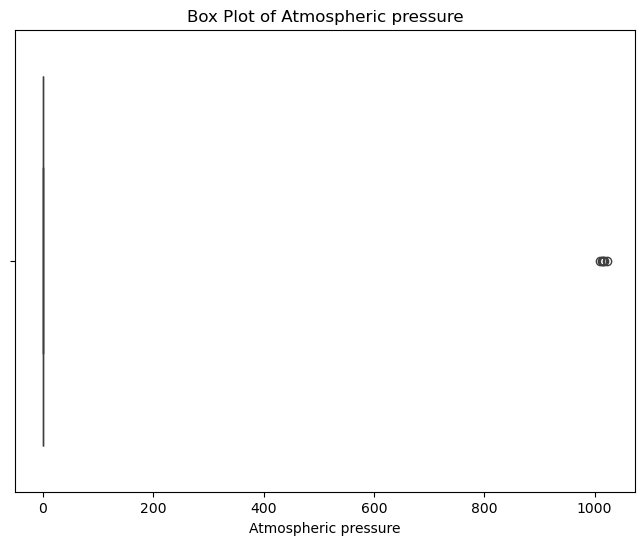

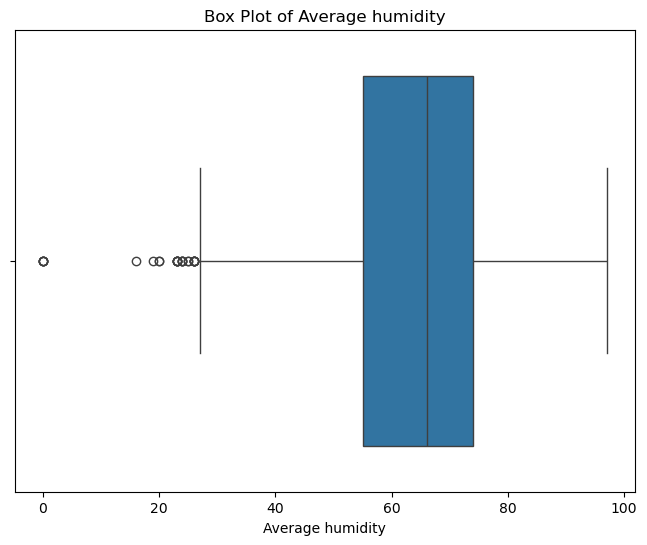

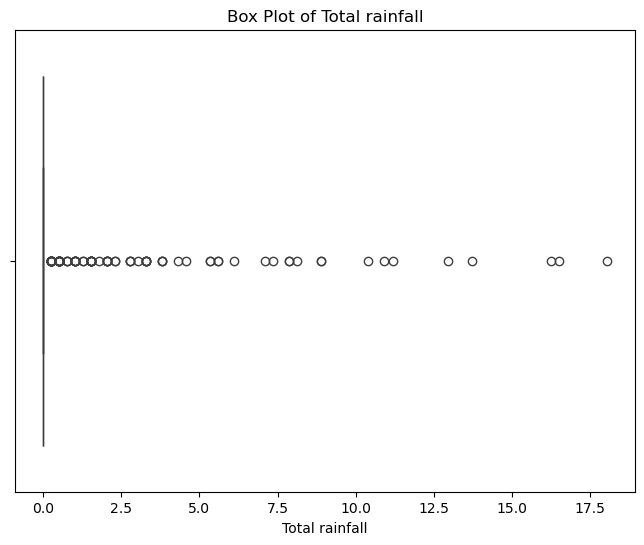

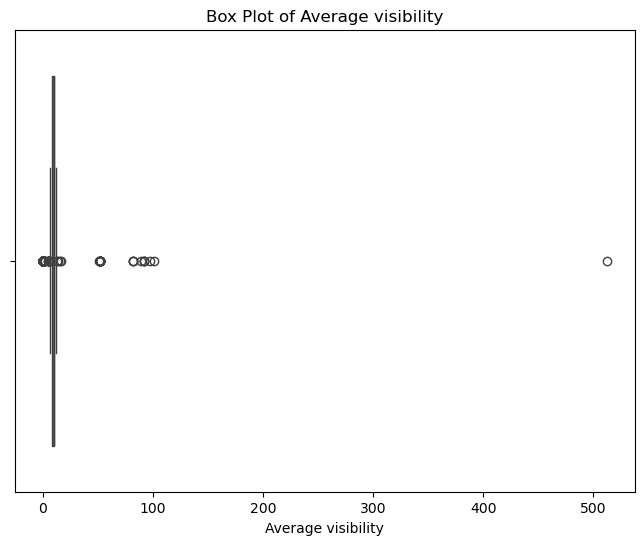

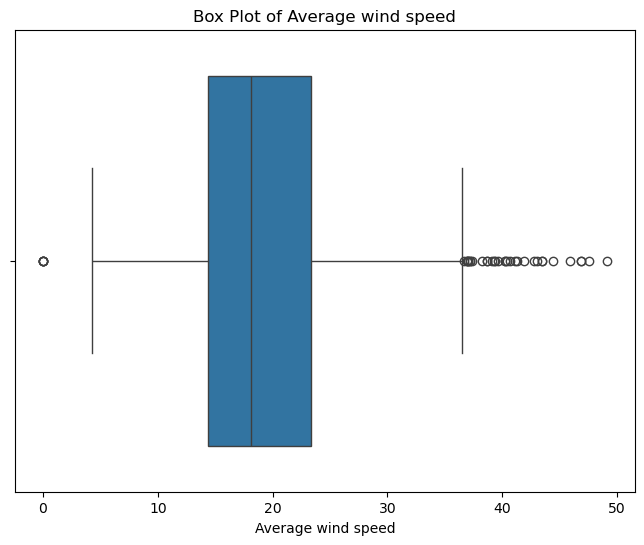

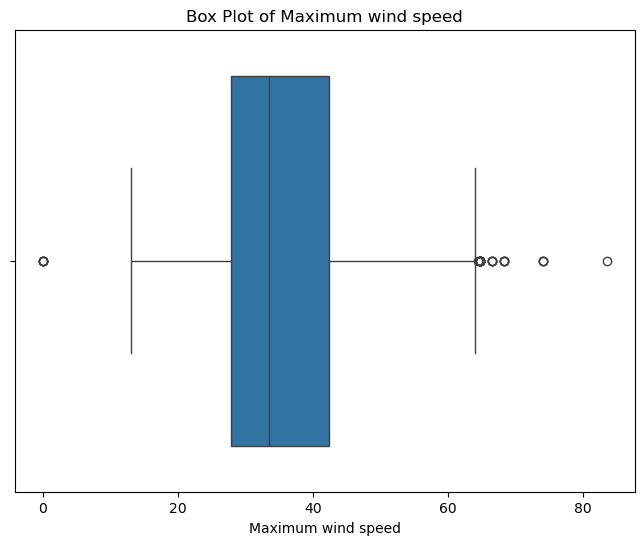

In [14]:
for col in atmospheric_values:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

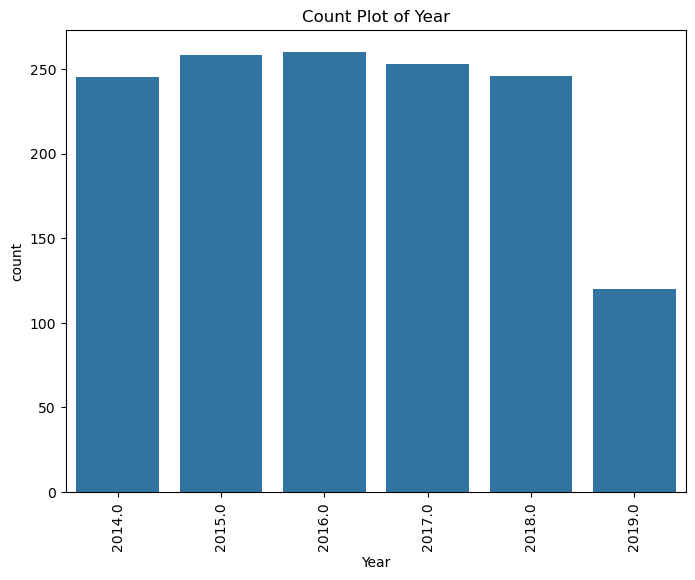

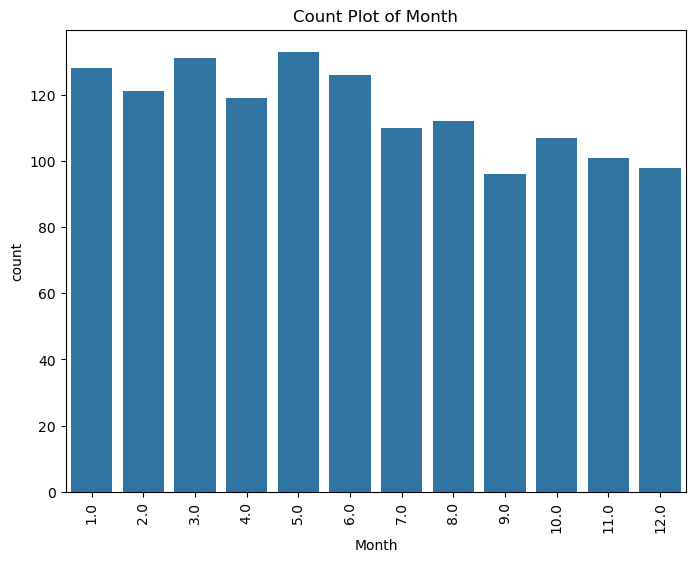

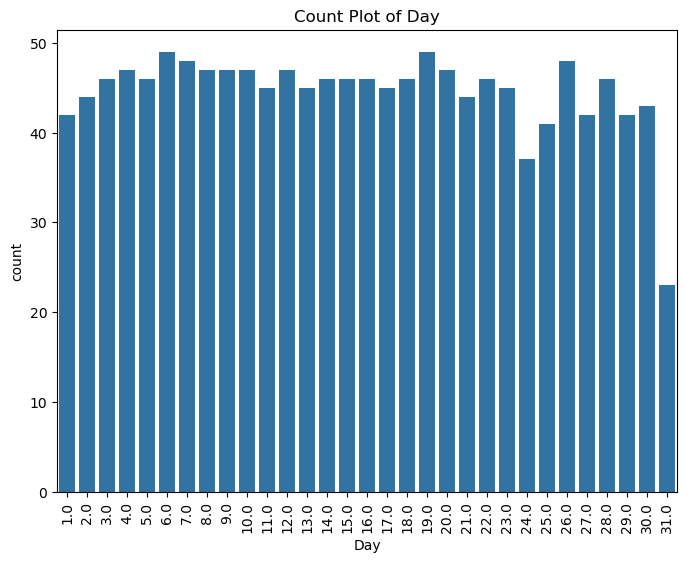

In [15]:
time_columns = [
    'Year',
    'Month',
    'Day',
]
for col in time_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation= 90)
    plt.show()

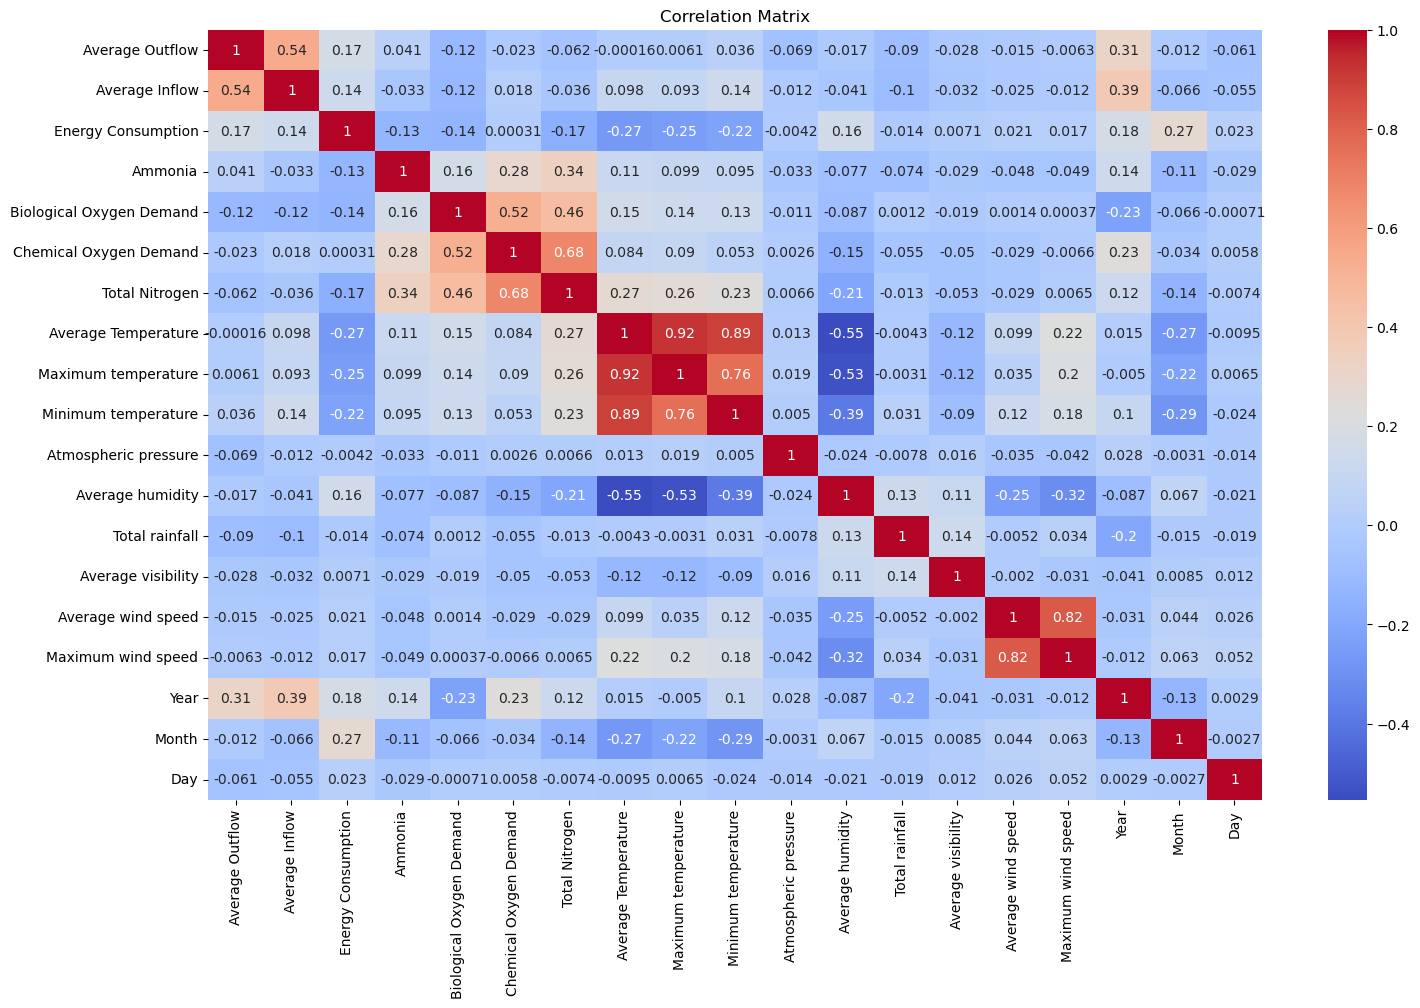

In [16]:
correlation_matrix = data.corr()
plt.figure(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
data.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)
data.sample(5)

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Date
966,4.129,4.487,285.9,48.0,350.0,930.0,62.942,14.9,25.0,5.0,0.0,73.0,0.0,9.7,19.1,38.9,2017-10-19
1098,3.398,4.035,263.4,44.0,340.0,710.0,62.032,12.2,18.0,8.0,0.0,81.0,0.0,10.0,12.0,24.1,2018-04-29
379,2.653,3.292,268.2,42.0,526.5,1053.0,63.643,8.1,14.0,2.0,0.0,83.0,0.0,10.0,12.0,22.2,2015-07-07
1023,5.034,4.023,200.2,29.0,530.0,890.0,56.000,19.7,28.0,13.9,0.0,58.0,0.0,0.0,11.9,20.6,2018-01-10
1063,0.143,6.693,253.1,40.0,360.0,860.0,63.995,21.7,30.0,13.7,0.0,46.0,0.0,0.0,18.1,33.5,2018-03-07


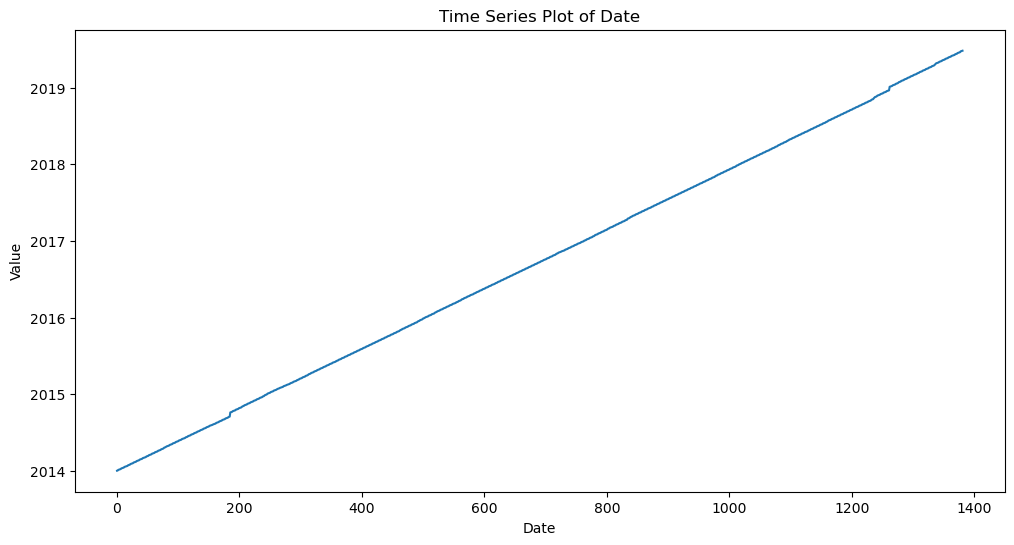

In [18]:
# Time Series Plot
data['Date'].plot(figsize=(12, 6))
plt.title('Time Series Plot of Date')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [19]:
styled_summary = data.iloc[:,:-1].describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(
    subset=['50%'], cmap='PuBu')
styled_summary

,count,mean,std,min,25%,50%,75%,max
Average Outflow,1382.000000,3.930608,1.228778,0.000004,3.074500,3.701000,4.498750,7.920000
Average Inflow,1382.000000,4.506338,1.439583,2.589000,3.643250,4.161500,4.847750,18.968000
Energy Consumption,1382.000000,275.159479,44.639574,116.600000,246.425000,275.800000,305.675000,398.300000
Ammonia,1382.000000,39.222302,7.761598,13.000000,34.000000,39.000000,44.000000,93.000000
Biological Oxygen Demand,1382.000000,382.061708,85.996012,140.000000,330.000000,360.000000,422.980000,850.000000
Chemical Oxygen Demand,1382.000000,845.960434,145.416540,360.000000,751.250000,845.000000,920.000000,1700.000000
Total Nitrogen,1382.000000,62.740752,3.571035,40.000000,61.396000,62.957500,64.366000,92.000000
Average Temperature,1382.000000,15.036686,5.398491,0.000000,10.800000,14.300000,18.575000,35.500000
Maximum temperature,1382.000000,20.530897,7.096760,0.000000,15.000000,19.200000,25.200000,43.500000
Minimum temperature,1382.000000,10.037337,4.656887,-2.000000,6.800000,9.600000,13.000000,28.500000


In [20]:
data = data.set_index("Date")
# Define your input features (X) and target variable (y)
X = data.drop("Chemical Oxygen Demand", axis=1)  # Input features (exclude COD)
y = data["Chemical Oxygen Demand"]  # Target variable (COD)


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the data (feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [22]:
# Define a simple feedforward neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=32)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE) on test set: {rmse:.2f}')

Epoch 1/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 728645.1250 - val_loss: 751998.6250
Epoch 2/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 723635.4375 - val_loss: 744521.2500
Epoch 3/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 701948.0000 - val_loss: 728774.1250
Epoch 4/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 698263.8750 - val_loss: 699687.5000
Epoch 5/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 660691.9375 - val_loss: 652445.6875
Epoch 6/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 604699.6875 - val_loss: 584518.2500
Epoch 7/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 536635.5000 - val_loss: 498560.6250
Epoch 8/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 436266.0938 - val_loss: 404304.8750
Epoch 9/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 344688.1562 - val_loss: 315654.1250
Epoch 10/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 246849.1719 - val_loss: 245267.6406
Epoch 11/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

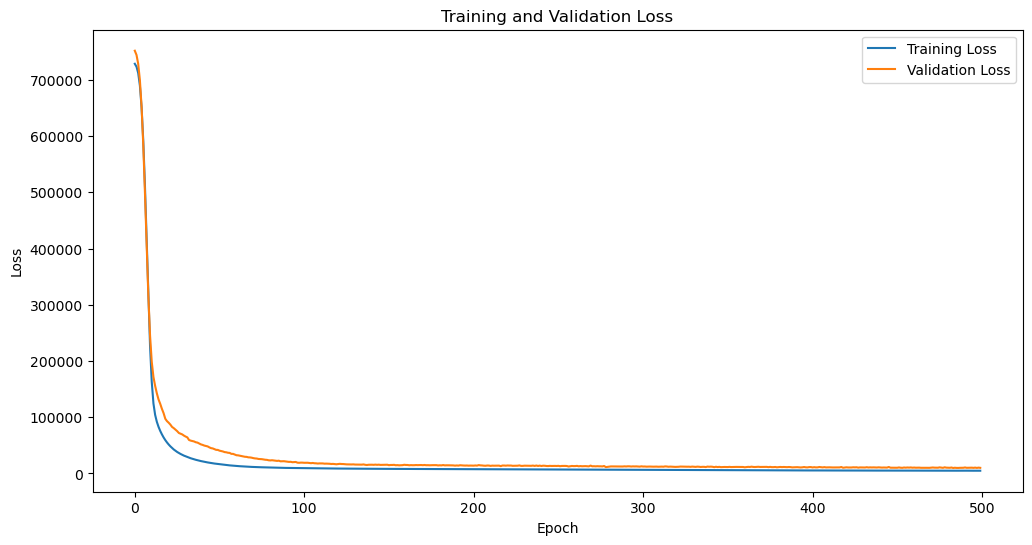

In [23]:
# Plot the training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# Define a feedforward neural network model
def create_ffn_model():
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define a convolutional neural network (CNN) model
def create_cnn_model():
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1], 1)),  # Assuming 1D data
        layers.Conv1D(32, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define a recurrent neural network (RNN) model with LSTM cells
def create_rnn_model():
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1], 1)),  # Assuming 1D data
        layers.LSTM(32, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and train the models
ffn_model = create_ffn_model()
ffn_history = ffn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

cnn_model = create_cnn_model()
cnn_history = cnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val), epochs=50, batch_size=32)

rnn_model = create_rnn_model()
rnn_history = rnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val), epochs=50, batch_size=32)

# Evaluate the models on the test set
y_ffn_pred = ffn_model.predict(X_test)
mse_ffn = mean_squared_error(y_test, y_ffn_pred)
rmse_ffn = np.sqrt(mse_ffn)
print(f'FFN RMSE on test set: {rmse_ffn:.2f}')

y_cnn_pred = cnn_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
mse_cnn = mean_squared_error(y_test, y_cnn_pred)
rmse_cnn = np.sqrt(mse_cnn)
print(f'CNN RMSE on test set: {rmse_cnn:.2f}')

y_rnn_pred = rnn_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
mse_rnn = mean_squared_error(y_test, y_rnn_pred)
rmse_rnn = np.sqrt(mse_rnn)
print(f'RNN RMSE on test set: {rmse_rnn:.2f}')

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 729335.0000 - val_loss: 751448.9375
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 734926.6250 - val_loss: 743018.0625
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 710586.3750 - val_loss: 726302.6250
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 691054.2500 - val_loss: 696415.6250
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 664146.4375 - val_loss: 649153.3125
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 617926.3125 - val_loss: 582111.1875
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 537691.4375 - val_loss: 498282.5625
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 430466.8750 - val_loss: 405271.2812
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 352326.9688 - val_loss: 315356.6875
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 252683.7656 - val_loss: 240166.7500
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss:

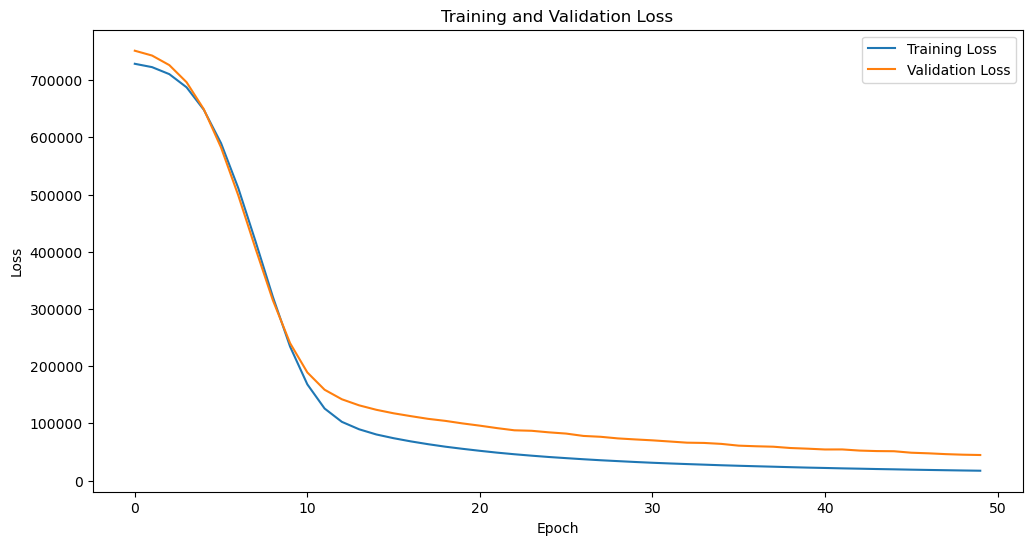

In [25]:
# Plot the training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(ffn_history.history['loss'], label='Training Loss')
plt.plot(ffn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

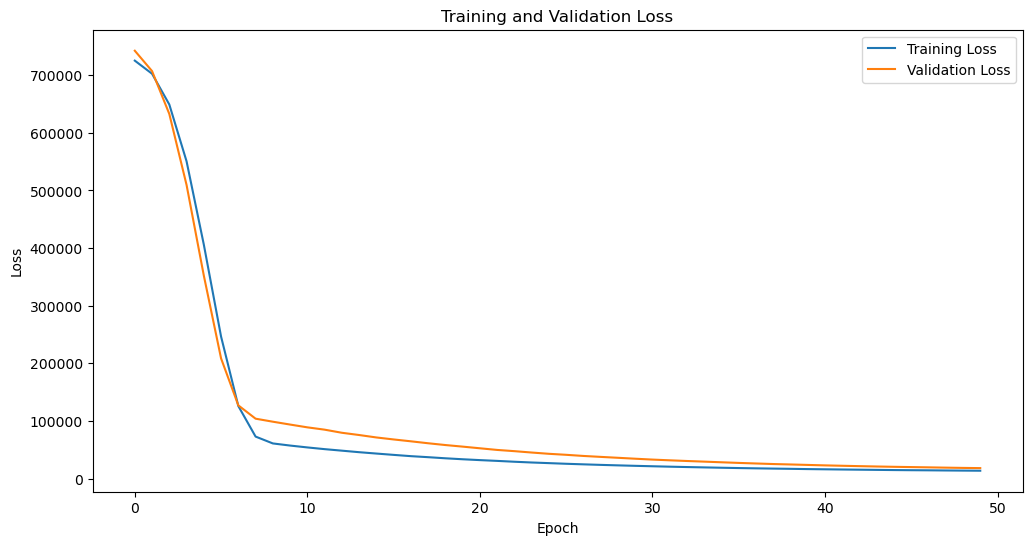

In [26]:
# Plot the training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

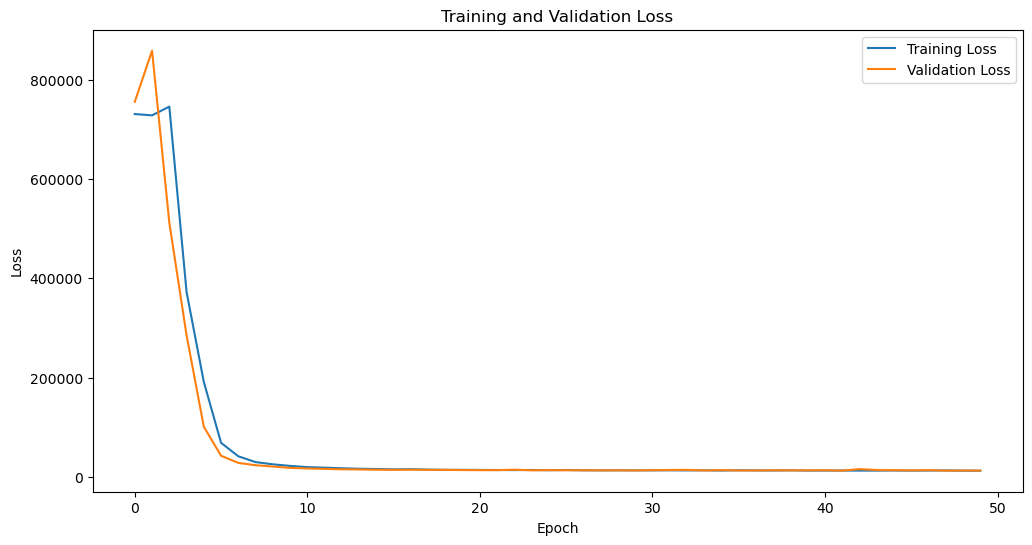

In [27]:
# Plot the training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
# Build a neural network model
model_neural = Sequential()
model_neural.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_neural.add(Dense(32, activation='relu'))
model_neural.add(Dense(1))  # Output layer (1 neuron for regression)

# Compile the model
model_neural.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
neural_history = model_neural.fit(X_train, y_train, epochs=400, batch_size=50, verbose=1)

# Make predictions on the test set
y_pred = model_neural.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Epoch 1/400


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 729553.8125
Epoch 2/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 721829.1875
Epoch 3/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 711124.8750
Epoch 4/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 722275.5625
Epoch 5/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 705848.9375
Epoch 6/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 687317.2500 
Epoch 7/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 669327.6875
Epoch 8/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 641019.8750 
Epoch 9/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 602417.8750 
Epoch 10/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 569380.6875
Epoch 11/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 491610.7500 
Epoch 12/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 439870.2812 
Epoch 13/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 378486.4375 
Epoch 14/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 317612.1875
Epoch 1

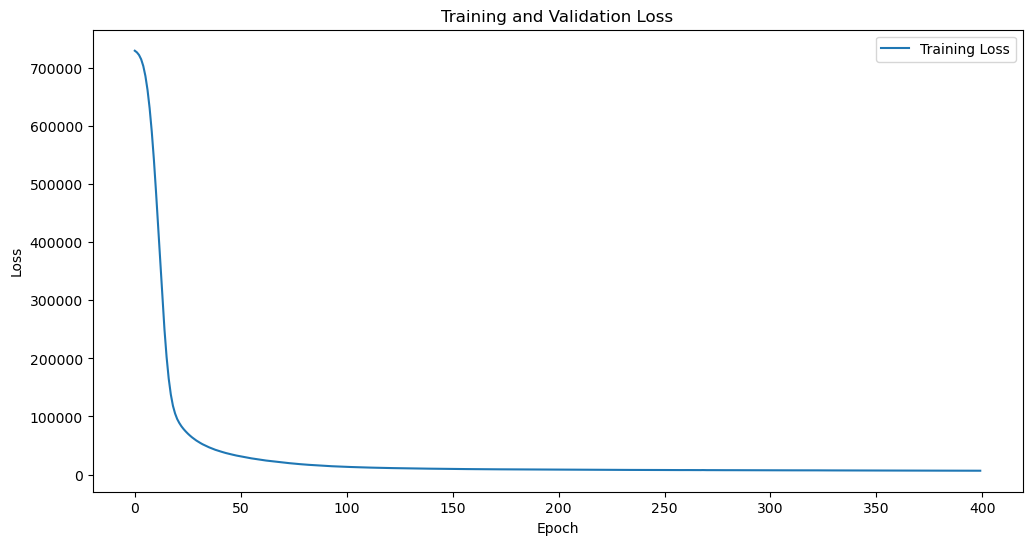

In [29]:
# Plot the training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(neural_history.history['loss'], label='Training Loss')
# plt.plot(neural_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

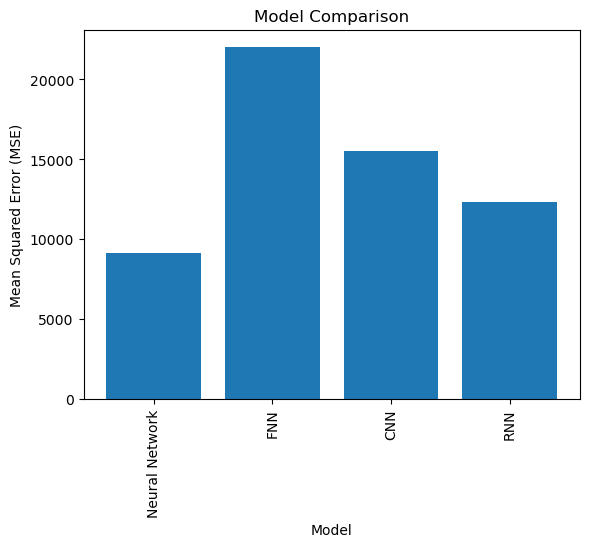

In [30]:
model_names = ['Neural Network', 'FNN', 'CNN', 'RNN']
mse_values = [mse,mse_ffn,mse_cnn,mse_rnn]

plt.bar(model_names, mse_values)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Comparison')
plt.xticks(rotation= 90)
plt.show()

In [31]:
model_neural.save("my_model.h5")